# EXP 3 ADS: Data Cleaning

In [1]:
import pandas as pd
df = pd.read_csv('sberbank.csv') # renamed from the csv file within train.csv.zip on Kaggle

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [2]:

numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


In [3]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  28895 non-null  object
 1   product_type               28895 non-null  object
 2   sub_area                   28895 non-null  object
 3   culture_objects_top_25     28895 non-null  object
 4   thermal_power_plant_raion  28895 non-null  object
 5   incineration_raion         28895 non-null  object
 6   oil_chemistry_raion        28895 non-null  object
 7   radiation_raion            28895 non-null  object
 8   railroad_terminal_raion    28895 non-null  object
 9   big_market_raion           28895 non-null  object
 10  nuclear_reactor_raion      28895 non-null  object
 11  detention_facility_raion   28895 non-null  object
 12  water_1line                28895 non-null  object
 13  big_road1_1line            28895 non-null  object
 14  railro

In [4]:
num_missing = df.isna().sum()
num_missing[:10]

id                0
timestamp         0
full_sq           0
life_sq        5437
floor           166
max_floor      9560
material       9560
build_year    12706
num_room       9560
kitch_sq       9560
dtype: int64

In [5]:
pct_missing = df.isna().mean()
pct_missing[:10]

id            0.000000
timestamp     0.000000
full_sq       0.000000
life_sq       0.188164
floor         0.005745
max_floor     0.330853
material      0.330853
build_year    0.439730
num_room      0.330853
kitch_sq      0.330853
dtype: float64

<Axes: >

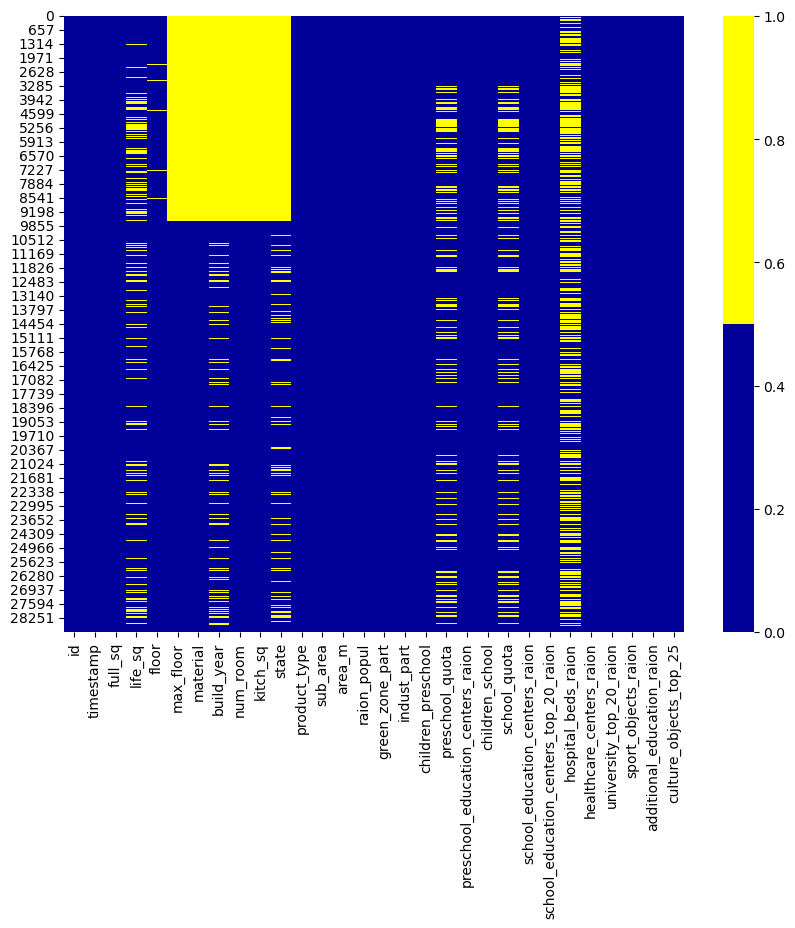

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

In [7]:
#!pip install missingno

<Axes: >

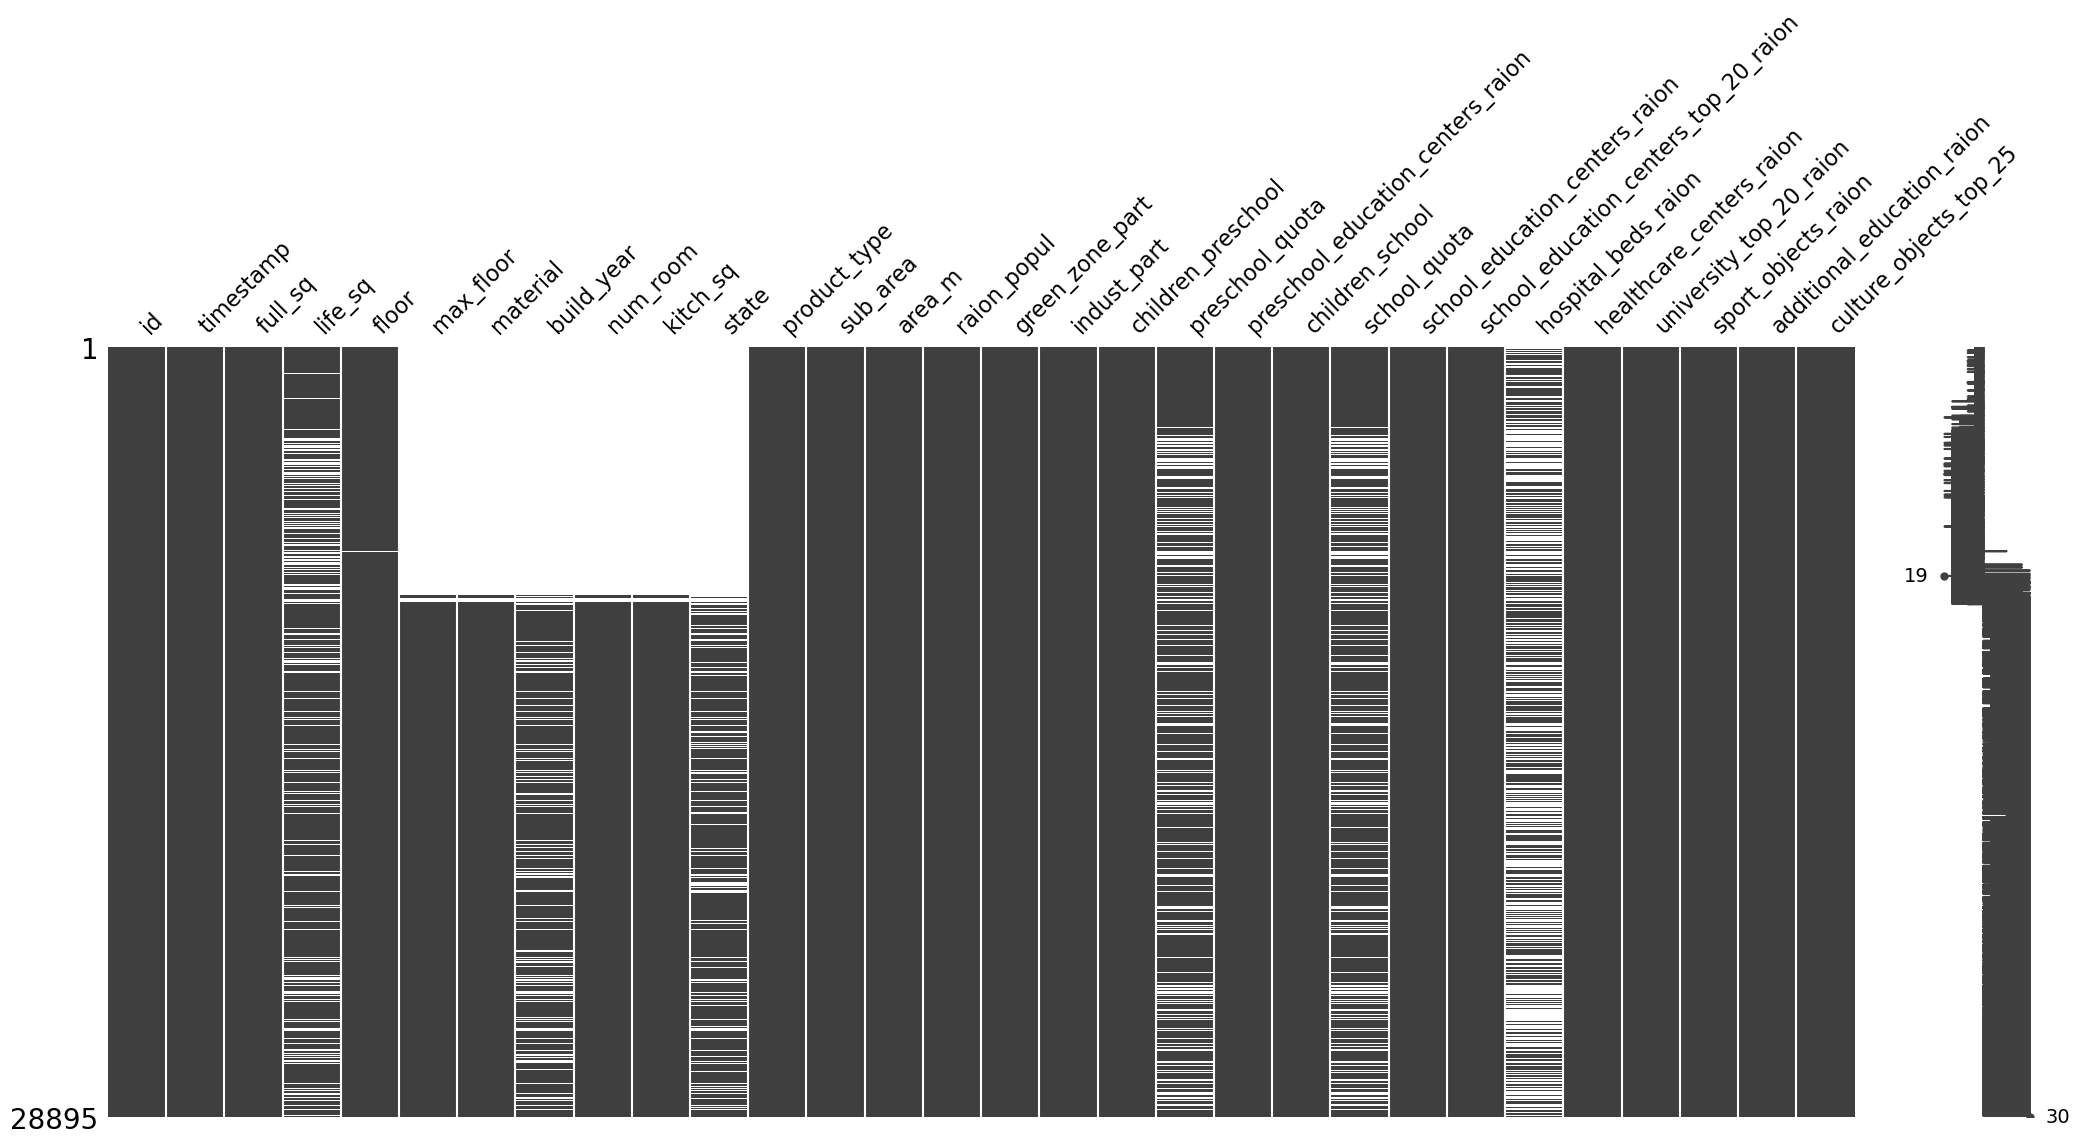

In [8]:

import missingno as msno
msno.matrix(df.iloc[:, :30])

<Axes: >

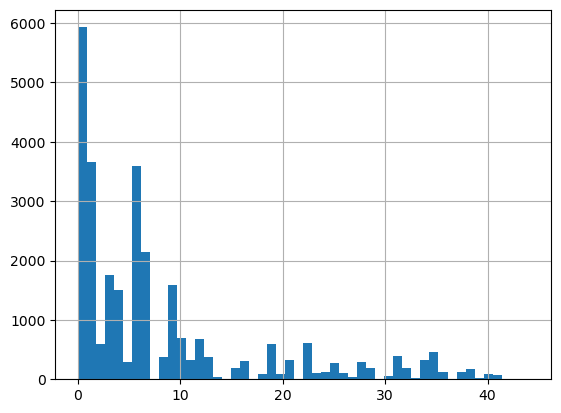

In [9]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

In [10]:

pct_missing[pct_missing > .3]

max_floor                     0.330853
material                      0.330853
build_year                    0.439730
num_room                      0.330853
kitch_sq                      0.330853
state                         0.442464
hospital_beds_raion           0.464371
cafe_sum_500_min_price_avg    0.424122
cafe_sum_500_max_price_avg    0.424122
cafe_avg_price_500            0.424122
dtype: float64

In [11]:

df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(28895, 282)

In [12]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(27830, 292)

In [13]:

df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

In [14]:

df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

In [15]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

timestamp                    2014-12-16
product_type                 Investment
sub_area                     Nekrasovka
culture_objects_top_25               no
thermal_power_plant_raion            no
incineration_raion                   no
oil_chemistry_raion                  no
radiation_raion                      no
railroad_terminal_raion              no
big_market_raion                     no
nuclear_reactor_raion                no
detention_facility_raion             no
water_1line                          no
big_road1_1line                      no
railroad_1line                       no
ecology                            poor
Name: top, dtype: object

In [16]:

df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

In [17]:

df.kurt(numeric_only=True)[:10]

id               -1.211526
full_sq       11986.408214
life_sq       17688.360420
floor             0.840711
max_floor        10.486339
material          1.165797
build_year       19.305688
num_room         14.343270
kitch_sq         97.887163
state            97.298776
dtype: float64

In [18]:

df['life_sq'].describe()

count    23458.000000
mean        34.143235
std         52.158376
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

<Axes: >

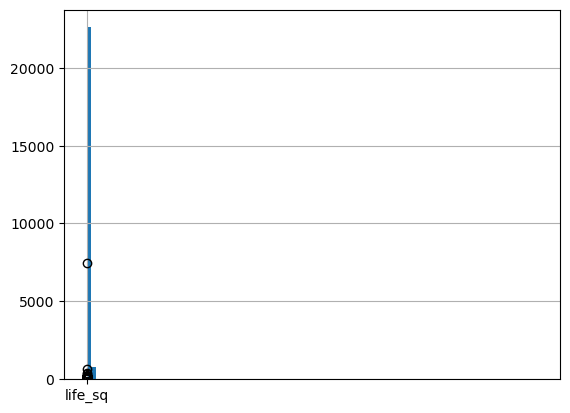

In [19]:

df['life_sq'].hist(bins=100)

df.boxplot(column=['life_sq'])

<Axes: >

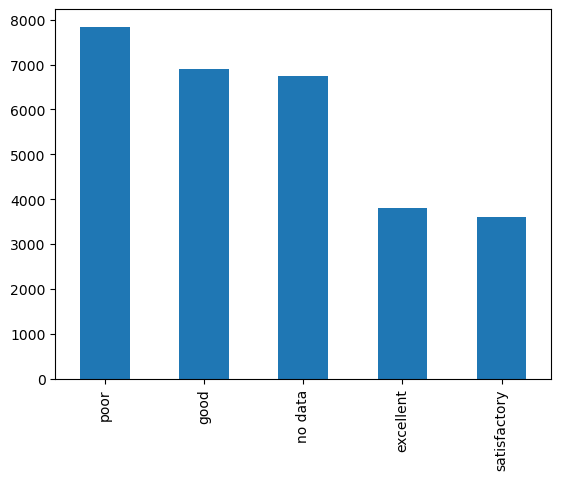

In [20]:

df['ecology'].value_counts().plot(kind='bar')

In [21]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [22]:

df[df.duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc


In [23]:

df.drop_duplicates()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28890,24023,2014-10-28,135,59.0,9.0,57.0,4.0,2007.0,3.0,22.0,...,49,16,5,19,36,0,5,115,13,56500000
28891,21855,2014-08-25,46,46.0,17.0,99.0,6.0,NaN,3.0,9.0,...,2,2,0,1,14,1,0,13,0,6670000
28892,21737,2014-08-21,71,71.0,5.0,99.0,6.0,NaN,2.0,9.0,...,13,1,0,5,15,0,3,35,3,8484365
28893,20725,2014-07-10,47,47.0,4.0,99.0,2.0,NaN,1.0,1.0,...,23,4,1,11,14,0,1,72,9,10238400


In [24]:
df_dedupped = df.drop(columns=['id']).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(28895, 292)
(28885, 291)


In [25]:

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df_grouped = df.fillna(-999).groupby(key)['id'].count()

df_grouped[df_grouped > 1]

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-08-27  59       -999.0   6.0    -999.0      -999.0    4506800      2
2012-09-05  43       -999.0   21.0   -999.0      -999.0    6229540      2
2012-10-22  61       -999.0   18.0   -999.0      -999.0    8248500      2
2013-04-03  42       -999.0   2.0    -999.0      -999.0    3444000      2
2013-05-22  68       -999.0   2.0    -999.0      -999.0    5406690      2
2013-06-24  40       -999.0   12.0   -999.0      -999.0    4112800      2
2013-08-30  40       -999.0   12.0   -999.0       1.0      4462000      2
2013-09-23  85       -999.0   14.0   -999.0       3.0      7725974      2
2013-12-05  40       -999.0   5.0    -999.0       1.0      4414080      2
2013-12-18  39       -999.0   6.0    -999.0       1.0      3700946      2
2014-01-22  46        28.0    1.0     1968.0      2.0      3000000      2
2014-04-15  134       134.0   1.0     0.0         3.0      5798496      2
2014-12-09  40       -999.0   17.0   -999.0

In [26]:

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(28895, 292)
(28879, 292)


In [27]:
df['sub_area'].value_counts(dropna=False)

Nekrasovka                        1511
Poselenie Sosenskoe               1426
Poselenie Vnukovskoe              1305
Poselenie Moskovskij               866
Tverskoe                           620
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

In [28]:
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

nekrasovka                        1511
poselenie sosenskoe               1426
poselenie vnukovskoe              1305
poselenie moskovskij               866
tverskoe                           620
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie mihajlovo-jarcevskoe       1
poselenie klenovskoe                 1
Name: sub_area_lower, Length: 146, dtype: int64

In [29]:
df['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
28890    2014-10-28
28891    2014-08-25
28892    2014-08-21
28893    2014-07-10
28894    2014-12-06
Name: timestamp, Length: 28895, dtype: object

In [30]:

df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

df[['timestamp_dt', 'year', 'month', 'weekday']].head()

,timestamp_dt,year,month,weekday
0,2011-08-20,2011,8,5
1,2011-08-23,2011,8,1
2,2011-08-27,2011,8,5
3,2011-09-01,2011,9,3
4,2011-09-05,2011,9,0


In [31]:
df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

cities = ['toronto', 'vancouver', 'montreal', 'calgary']
from nltk.metrics import edit_distance
for city in cities:
    df_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


In [32]:

msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


In [33]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


In [34]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
